In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.__version__

'2.0.0'

In [3]:
tf.test.is_gpu_available()

True

In [4]:
import os

In [5]:
os.listdir('./annotations/trimaps')[-5:]

['yorkshire_terrier_95.png',
 'yorkshire_terrier_96.png',
 'yorkshire_terrier_97.png',
 'yorkshire_terrier_98.png',
 'yorkshire_terrier_99.png']

In [6]:
img = tf.io.read_file('./annotations/trimaps/yorkshire_terrier_99.png')

In [7]:
img = tf.image.decode_png(img)

In [8]:
img.shape

TensorShape([358, 500, 1])

In [9]:
img = tf.squeeze(img)

In [10]:
img.shape

TensorShape([358, 500])

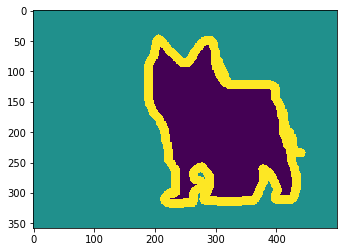

In [11]:
plt.imshow(img.numpy())
plt.show()

In [12]:
img.numpy().max()

3

In [13]:
img.numpy().min()

1

In [14]:
np.unique(img.numpy())

array([1, 2, 3], dtype=uint8)

In [15]:
img = tf.io.read_file('./images/yorkshire_terrier_99.jpg')

In [16]:
img = tf.image.decode_png(img)

In [17]:
img.shape

TensorShape([358, 500, 3])

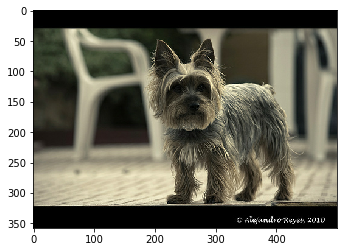

In [18]:
plt.imshow(img.numpy())
plt.show()

In [19]:
import glob

In [20]:
images = glob.glob('./images/*.jpg')

In [21]:
images[:5]

['./images\\Abyssinian_1.jpg',
 './images\\Abyssinian_10.jpg',
 './images\\Abyssinian_100.jpg',
 './images\\Abyssinian_101.jpg',
 './images\\Abyssinian_102.jpg']

In [22]:
len(images)

7390

In [23]:
images.sort(key=lambda x: x.split('/')[-1])

In [24]:
images[:5]

['./images\\Abyssinian_1.jpg',
 './images\\Abyssinian_10.jpg',
 './images\\Abyssinian_100.jpg',
 './images\\Abyssinian_101.jpg',
 './images\\Abyssinian_102.jpg']

In [25]:
images[-5:]

['./images\\yorkshire_terrier_95.jpg',
 './images\\yorkshire_terrier_96.jpg',
 './images\\yorkshire_terrier_97.jpg',
 './images\\yorkshire_terrier_98.jpg',
 './images\\yorkshire_terrier_99.jpg']

In [26]:
annotations = glob.glob('./annotations/trimaps/*.png')

In [27]:
annotations[:5]

['./annotations/trimaps\\Abyssinian_1.png',
 './annotations/trimaps\\Abyssinian_10.png',
 './annotations/trimaps\\Abyssinian_100.png',
 './annotations/trimaps\\Abyssinian_101.png',
 './annotations/trimaps\\Abyssinian_102.png']

In [28]:
len(annotations)

7390

In [29]:
annotations.sort(key=lambda x: x.split('/')[-1])

In [30]:
annotations[:5]

['./annotations/trimaps\\Abyssinian_1.png',
 './annotations/trimaps\\Abyssinian_10.png',
 './annotations/trimaps\\Abyssinian_100.png',
 './annotations/trimaps\\Abyssinian_101.png',
 './annotations/trimaps\\Abyssinian_102.png']

In [31]:
annotations[-5:]

['./annotations/trimaps\\yorkshire_terrier_95.png',
 './annotations/trimaps\\yorkshire_terrier_96.png',
 './annotations/trimaps\\yorkshire_terrier_97.png',
 './annotations/trimaps\\yorkshire_terrier_98.png',
 './annotations/trimaps\\yorkshire_terrier_99.png']

In [32]:
len(images), len(annotations)

(7390, 7390)

In [33]:
np.random.seed(2019)
index = np.random.permutation(len(images))

In [34]:
images = np.array(images)[index]

In [35]:
images[:5]

array(['./images\\newfoundland_22.jpg',
       './images\\scottish_terrier_12.jpg',
       './images\\miniature_pinscher_155.jpg',
       './images\\samoyed_106.jpg', './images\\great_pyrenees_38.jpg'],
      dtype='<U43')

In [36]:
anno = np.array(annotations)[index]

In [37]:
anno[:5]

array(['./annotations/trimaps\\newfoundland_22.png',
       './annotations/trimaps\\scottish_terrier_12.png',
       './annotations/trimaps\\miniature_pinscher_155.png',
       './annotations/trimaps\\samoyed_106.png',
       './annotations/trimaps\\great_pyrenees_38.png'], dtype='<U56')

In [38]:
dataset = tf.data.Dataset.from_tensor_slices((images, anno))

In [39]:
test_count = int(len(images)*0.2)

In [40]:
test_count

1478

In [41]:
train_count = len(images) - test_count

In [42]:
dataset_train = dataset.skip(test_count)

In [43]:
dataset_test = dataset.take(test_count)

In [44]:
def read_jpg(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    return img

In [45]:
def read_png(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=1)
    return img

In [46]:
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32)/127.5 - 1
    input_mask -= 1
    return input_image, input_mask

In [48]:
def load_image(input_image_path, input_mask_path):
    input_image = read_jpg(input_image_path)
    input_mask = read_png(input_mask_path)
    input_image = tf.image.resize(input_image, (224, 224))
    input_mask = tf.image.resize(input_mask, (224, 224))

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

In [49]:
BATCH_SIZE = 8
BUFFER_SIZE = 100
STEPS_PER_EPOCH = train_count // BATCH_SIZE
VALIDATION_STEPS = test_count // BATCH_SIZE

In [50]:
train = dataset_train.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = dataset_test.map(load_image)

In [51]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

In [52]:
train_dataset

<PrefetchDataset shapes: ((None, 224, 224, 3), (None, 224, 224, 1)), types: (tf.float32, tf.float32)>

In [53]:
%matplotlib inline

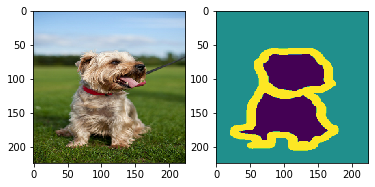

In [54]:
for img, musk in train_dataset.take(1):
    plt.subplot(1,2,1)
    plt.imshow(tf.keras.preprocessing.image.array_to_img(img[0]))
    plt.subplot(1,2,2)
    plt.imshow(tf.keras.preprocessing.image.array_to_img(musk[0]))

In [55]:
covn_base = tf.keras.applications.VGG16(weights='imagenet', 
                                        input_shape=(224, 224, 3),
                                        include_top=False)

In [56]:
covn_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [57]:
layer_names = [
    'block5_conv3',   # 14x14
    'block4_conv3',   # 28x28
    'block3_conv3',   # 56x56
    'block5_pool',
]
layers = [covn_base.get_layer(name).output for name in layer_names]

# 创建特征提取模型
down_stack = tf.keras.Model(inputs=covn_base.input, outputs=layers)

down_stack.trainable = False

In [58]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3))
o1, o2, o3, x = down_stack(inputs)
x1 = tf.keras.layers.Conv2DTranspose(512, 3, padding='same', 
                                     strides=2, activation='relu')(x)  # 14*14
x1 = tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu')(x1)  # 14*14
c1 = tf.add(o1, x1)    # 14*14
x2 = tf.keras.layers.Conv2DTranspose(512, 3, padding='same', 
                                     strides=2, activation='relu')(c1)  # 14*14
x2 = tf.keras.layers.Conv2D(512, 3, padding='same', activation='relu')(x2)  # 14*14
c2 = tf.add(o2, x2)
x3 = tf.keras.layers.Conv2DTranspose(256, 3, padding='same', 
                                     strides=2, activation='relu')(c2)  # 14*14
x3 = tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu')(x3)  # 14*14
c3 = tf.add(o3, x3)

x4 = tf.keras.layers.Conv2DTranspose(128, 3, padding='same', 
                                     strides=2, activation='relu')(c3)  # 14*14
x4 = tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu')(x4)  # 14*14

predictions = tf.keras.layers.Conv2DTranspose(3, 3, padding='same', 
                                     strides=2, activation='softmax')(x4)

model = tf.keras.models.Model(inputs=inputs, outputs=predictions)

In [59]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
model (Model)                   [(None, 14, 14, 512) 14714688    input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_transpose (Conv2DTranspo (None, 14, 14, 512)  2359808     model[1][3]                      
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 14, 14, 512)  2359808     conv2d_transpose[0][0]           
____________________________________________________________________________________________

In [60]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
EPOCHS = 20

In [62]:
history = model.fit(train_dataset, 
                          epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset)

Train for 739 steps, validate for 184 steps
Epoch 1/20
739/739 [==============================] - 899s 1s/step - loss: 0.3392 - accuracy: 0.8641 - val_loss: 0.2752 - val_accuracy: 0.8935
Epoch 2/20
739/739 [==============================] - 876s 1s/step - loss: 0.2576 - accuracy: 0.8959 - val_loss: 0.2647 - val_accuracy: 0.8950
Epoch 3/20
739/739 [==============================] - 877s 1s/step - loss: 0.2349 - accuracy: 0.9044 - val_loss: 0.2558 - val_accuracy: 0.9017
Epoch 4/20
739/739 [==============================] - 880s 1s/step - loss: 0.2156 - accuracy: 0.9108 - val_loss: 0.2552 - val_accuracy: 0.9027
Epoch 5/20
739/739 [==============================] - 871s 1s/step - loss: 0.2007 - accuracy: 0.9164 - val_loss: 0.2620 - val_accuracy: 0.9023
Epoch 6/20
739/739 [==============================] - 871s 1s/step - loss: 0.1858 - accuracy: 0.9216 - val_loss: 0.2649 - val_accuracy: 0.9028
Epoch 7/20
739/739 [==============================] - 872s 1s/step - loss: 0.1737 - accuracy: 0.92

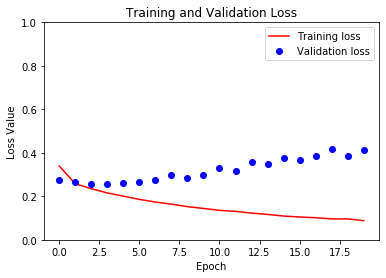

In [63]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [64]:
num = 3

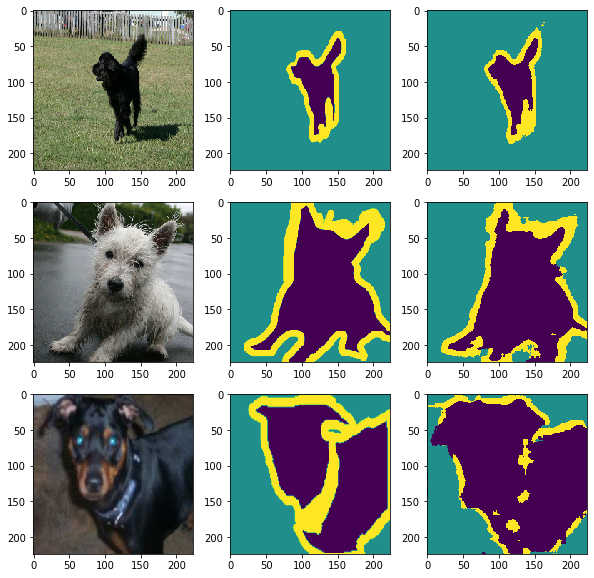

In [65]:
for image, mask in test_dataset.take(1):
    pred_mask = model.predict(image)
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    
    plt.figure(figsize=(10, 10))
    for i in range(num):
        plt.subplot(num, 3, i*num+1)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(image[i]))
        plt.subplot(num, 3, i*num+2)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(mask[i]))
        plt.subplot(num, 3, i*num+3)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(pred_mask[i]))

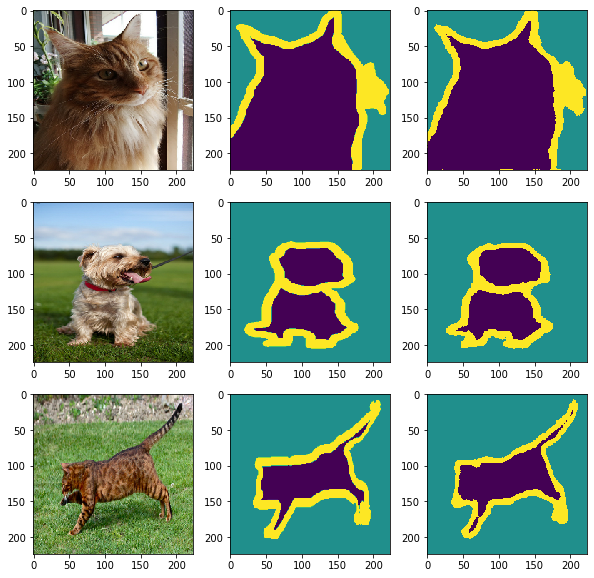

In [66]:
for image, mask in train_dataset.take(1):
    pred_mask = model.predict(image)
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    
    plt.figure(figsize=(10, 10))
    for i in range(num):
        plt.subplot(num, 3, i*num+1)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(image[i]))
        plt.subplot(num, 3, i*num+2)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(mask[i]))
        plt.subplot(num, 3, i*num+3)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(pred_mask[i]))

In [67]:
model.save('fcn.h5')